In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

path = 'C:\scripts Python\synergy_logistics_database.csv'
data = pd.read_csv(path)
data.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [2]:
print('El dataset esta compuesto por una cantidad de registros de los siguientes años:')
print(data.year.unique())
print('Los medios de transporte son:')
print(data.transport_mode.unique())

El dataset esta compuesto por una cantidad de registros de los siguientes años:
[2015 2016 2017 2018 2019 2020]
Los medios de transporte son:
['Sea' 'Air' 'Rail' 'Road']


# Rutas de importación y exportación

¿Cuáles son las 10 rutas más demandadas?

**Para el análisis, se considera el recuento de todas las importaciones y exportaciones para las distintas rutas (origen->destino y medio de transporte) de todos los años registrados en el dataset.**

In [64]:
top_routes = data.groupby(by=['origin','destination','transport_mode']).agg(total=('register_id','count'),total_value=('total_value','sum')).reset_index().sort_values(by='total',ascending=False)
top_routes['route'] = top_routes.origin + '->' + top_routes.destination + ' [via ' + top_routes.transport_mode + ']'
top_routes.head(10)

,origin,destination,transport_mode,total,total_value,route
162,South Korea,Vietnam,Sea,497,6877007000,South Korea->Vietnam [via Sea]
189,USA,Netherlands,Sea,436,1032187000,USA->Netherlands [via Sea]
133,Netherlands,Belgium,Road,374,3230094000,Netherlands->Belgium [via Road]
37,China,Mexico,Air,330,12250000000,China->Mexico [via Air]
100,Japan,Brazil,Sea,306,3368155000,Japan->Brazil [via Sea]
67,Germany,France,Road,299,2902214000,Germany->France [via Road]
158,South Korea,Japan,Sea,294,4741000000,South Korea->Japan [via Sea]
66,Germany,China,Sea,282,2618000000,Germany->China [via Sea]
4,Australia,Singapore,Sea,273,493000000,Australia->Singapore [via Sea]
153,Singapore,Thailand,Sea,273,4017000000,Singapore->Thailand [via Sea]


**En general, se puede observar que las 10 rutas con mayor volumen de importaciones, son las presentadas en la tabla anterior, teniendo las rutas de South Korea->Vietnam por mar y USA->Netherlands por mar con un volumen total mayor a 400.**

¿Conviene implementar la estrategia de enfocar sus esfuerzos en las 10 rutas?

In [65]:
top_value = data.groupby(by=['origin','destination','transport_mode']).agg(total=('register_id','count'),total_value=('total_value','sum')).reset_index().sort_values(by='total_value',ascending=False)
top_value['route'] = top_value.origin + '->' + top_value.destination + ' [via ' + top_value.transport_mode + ']'
top_value.head(10)

,origin,destination,transport_mode,total,total_value,route
37,China,Mexico,Air,330,12250000000,China->Mexico [via Air]
27,Canada,Mexico,Rail,261,8450000000,Canada->Mexico [via Rail]
162,South Korea,Vietnam,Sea,497,6877007000,South Korea->Vietnam [via Sea]
62,France,United Kingdom,Sea,147,5427000000,France->United Kingdom [via Sea]
158,South Korea,Japan,Sea,294,4741000000,South Korea->Japan [via Sea]
41,China,South Korea,Rail,144,4535000000,China->South Korea [via Rail]
187,USA,Mexico,Rail,178,4370000000,USA->Mexico [via Rail]
51,France,Belgium,Road,105,4257000000,France->Belgium [via Road]
34,China,Germany,Air,142,4090000000,China->Germany [via Air]
35,China,Japan,Air,238,4018000000,China->Japan [via Air]


**Con los datos obtenidos, no se recomienda enfocarse en su totalidad en las rutas con un mayor volumen de importaciones y exportaciones, ya que si obtenemos el top 10 de rutas basándonos en el valor total de las importaciones y exportaciones, podemos observar que únicamente 3/10 rutas estan presentes en ambas tablas. Esto nos indica que existen 7 rutas que si bien el volumen de importaciones y exportaciones no es tan alto como otras, producen más valor que las que tienen un mayor volumen.**

C:\Users\enriq\AppData\Local\Temp/ipykernel_4652/1780741019.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_routes.route, rotation = 45)


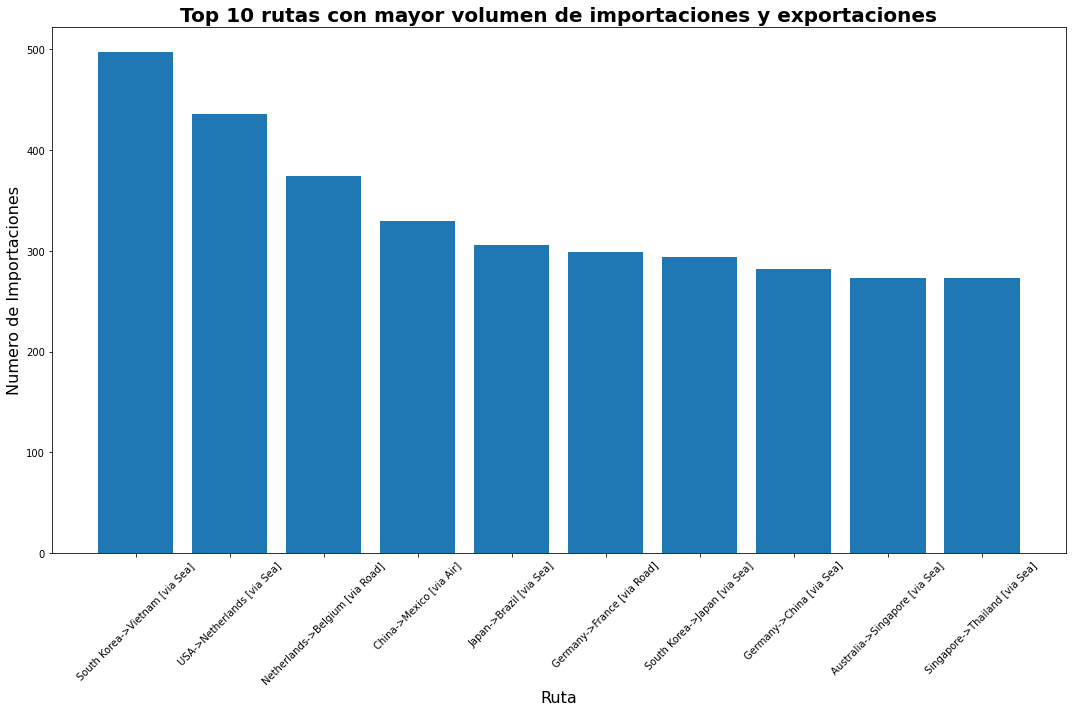

In [71]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(top_routes.route.head(10),top_routes.total.head(10))

ax.set_title('Top 10 rutas con mayor volumen de importaciones y exportaciones')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Ruta')
ax.set_ylabel('Numero de Importaciones')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

ax.set_xticklabels(top_routes.route, rotation = 45)

fig.tight_layout()

C:\Users\enriq\AppData\Local\Temp/ipykernel_4652/1483537387.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_value.route, rotation = 45)


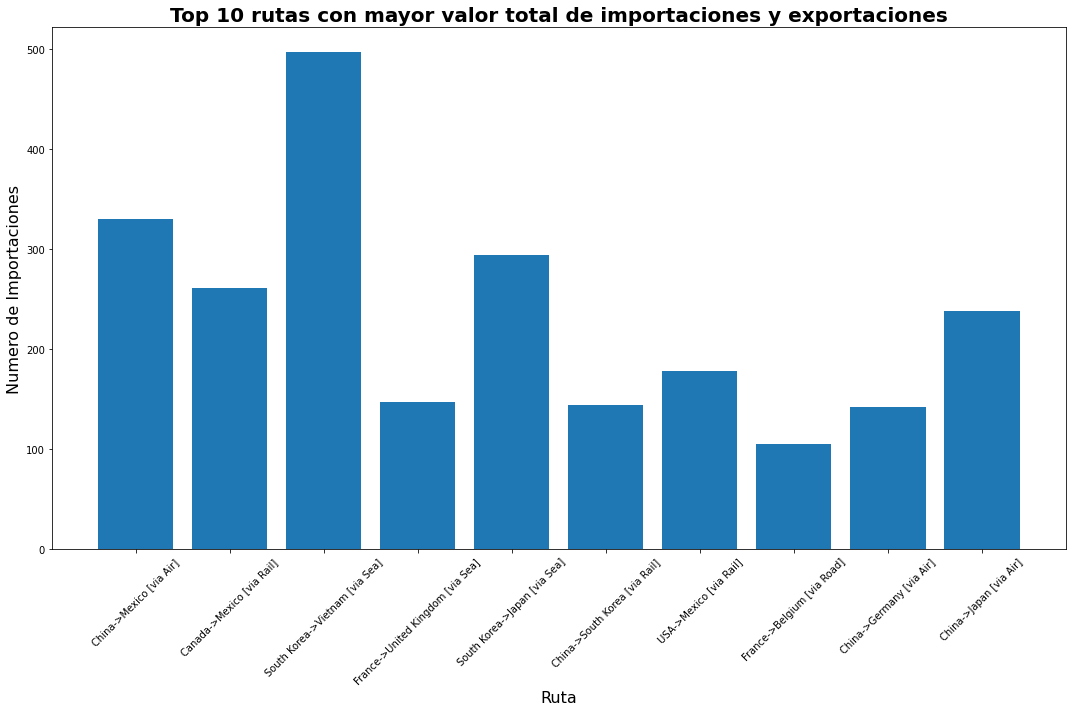

In [72]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(top_value.route.head(10),top_value.total.head(10))

ax.set_title('Top 10 rutas con mayor valor total de importaciones y exportaciones')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Ruta')
ax.set_ylabel('Numero de Importaciones')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

ax.set_xticklabels(top_value.route, rotation = 45)

fig.tight_layout()

# Medio de transporte utilizado

¿Cuáles son los 3 medios de transporte más importantes para Synergy logistics considerando el valor de las importaciones y exportaciones?

**Para el análisis, se considera la suma del valor de las importaciones y exportaciones para los distintos medios de transporte de todos los años registrados en el dataset.**

In [57]:
top_transport = data.groupby(by=['transport_mode']).agg(total_value=('total_value','sum')).reset_index().sort_values(by='total_value',ascending=False)
top_transport

,transport_mode,total_value
3,Sea,100530622000
1,Rail,43628043000
0,Air,38262147000
2,Road,33270486000


**Si se considera en conjunto el valor de las importaciones y exportaciones, se obtiene que los 3 medios más importantes son por mar, tren y aire. A continuación, se obtiene el análisis clasificando también por dirección (importación o exportación).**

In [6]:
top_transport_dir = data.groupby(by=['transport_mode','direction']).agg(total_value=('total_value','sum')).reset_index().sort_values(by='total_value',ascending=False)
top_transport_exp = top_transport_dir[top_transport_dir.direction == 'Imports']
top_transport_imp = top_transport_dir[top_transport_dir.direction == 'Exports']

In [7]:
top_transport_exp.sort_values(by='total_value',ascending=False)

,transport_mode,direction,total_value
7,Sea,Imports,34938000000
3,Rail,Imports,9123000000
5,Road,Imports,5990000000
1,Air,Imports,5477000000


In [8]:
top_transport_imp.sort_values(by='total_value',ascending=False)

,transport_mode,direction,total_value
6,Sea,Exports,65592622000
2,Rail,Exports,34505043000
0,Air,Exports,32785147000
4,Road,Exports,27280486000


**Los resultados obtenidos nos muestran una variación en las exportaciones, donde el tercer medio de transporte más importante es por carretera.**

¿Cuál es medio de transporte que podrían reducir?

**Basado en los datos con los que se cuenta, y que se identifica que existen únicamente 4 medios de transporte, podría reducirse el medio de transporte por carretera para las importaciones, ya que a diferencia contra el tercer medio más usado es lo suficientemente significativo para considerar reducirlo (considerando que la diferencia es de aproximadamente 6 mil millones de dólares). Por el contrario, para las exportaciones, los medios de transporte que se pudieran reducir son por aire y carretera, esto debido a la diferencia del total de valor en comparación al segundo medio de transporte más usado, el cual es por tren.**

**Adicionalmente, se identifica que general las importaciones y exportaciones tienen una diferencia aún más significativa contra el medio de transporte por mar, esto puede deberse a las bajas tarifas que tiene este medio de transporte. Por lo tanto, se sugiere evaluar si hay productos que se puedan cambiar a medios de transporte por mar, ya que estos representan la opción más viable para las importaciones y exportaciones. El medio de transporte por carretera demuestra en ambos casos que es un medio de transporte que se pudiera reducir.**

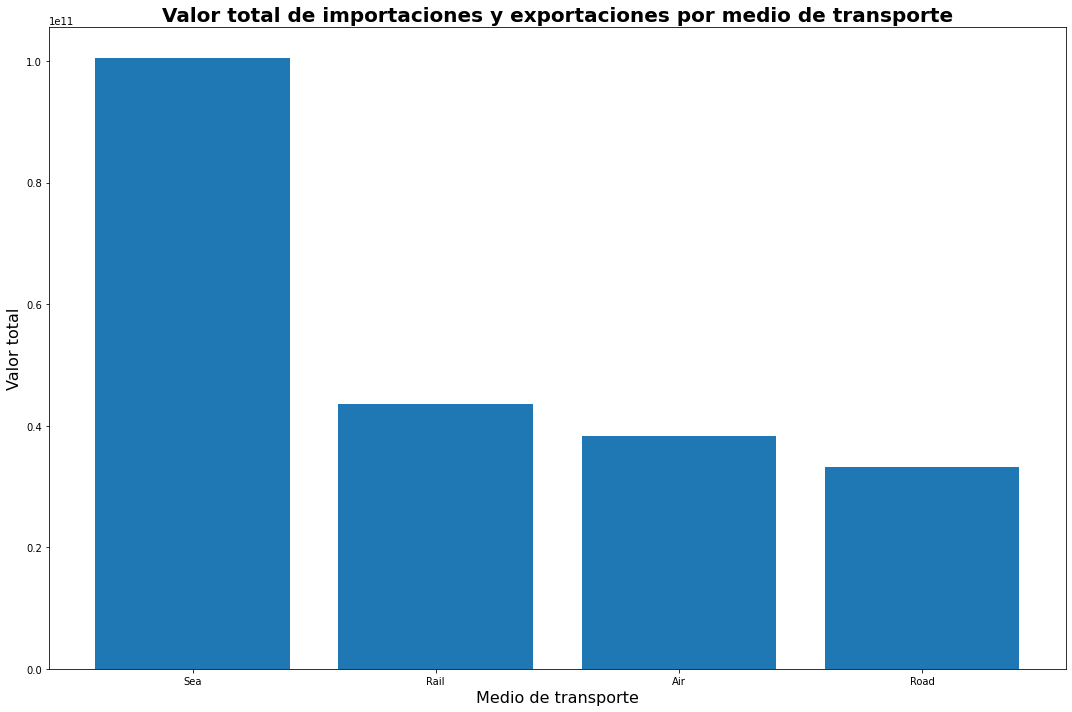

In [58]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(top_transport.transport_mode,top_transport.total_value)

ax.set_title('Valor total de importaciones y exportaciones por medio de transporte')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Medio de transporte')
ax.set_ylabel('Valor total')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

fig.tight_layout()

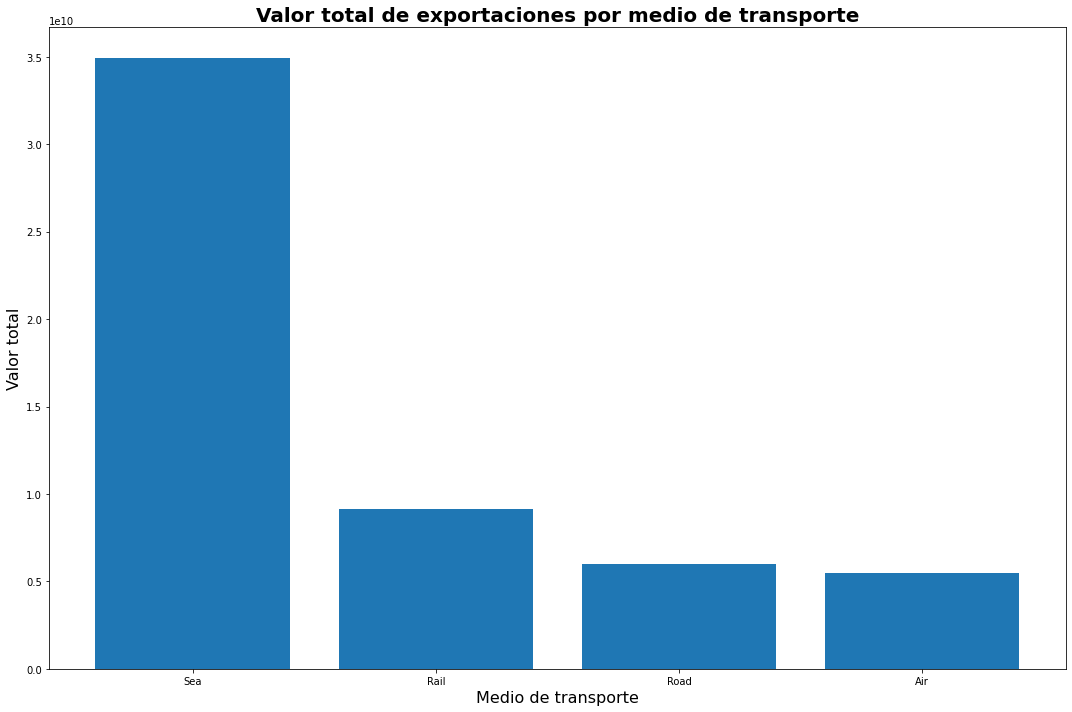

In [74]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(top_transport_exp.transport_mode,top_transport_exp.total_value)

ax.set_title('Valor total de exportaciones por medio de transporte')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Medio de transporte')
ax.set_ylabel('Valor total')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

fig.tight_layout()

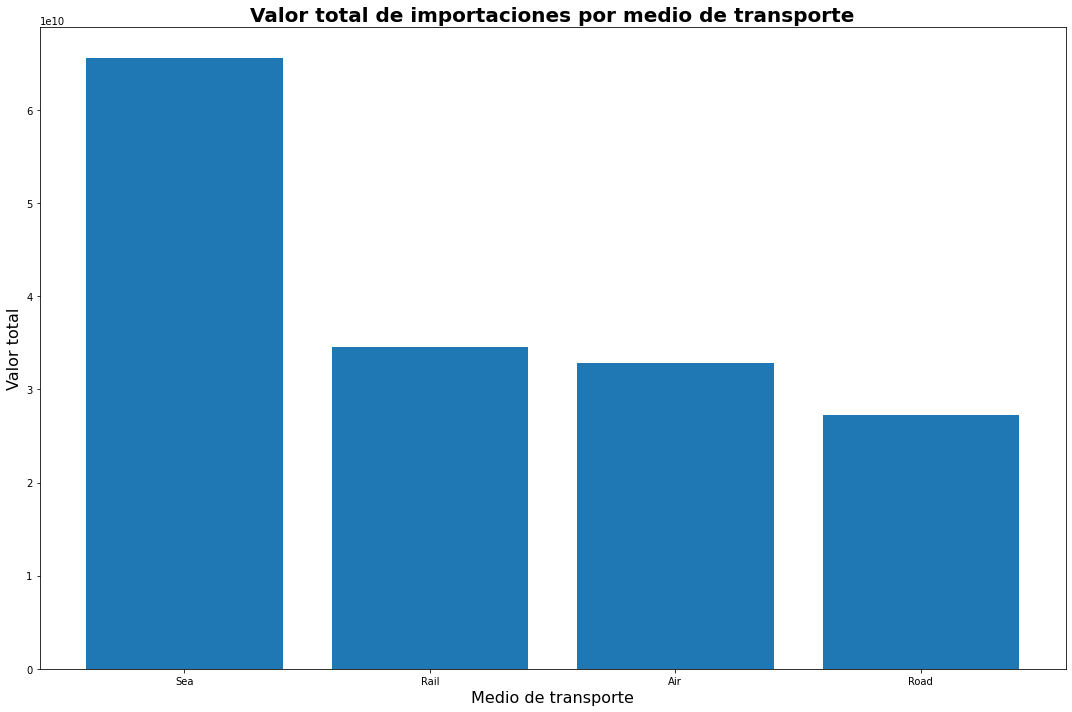

In [73]:
fig,ax = plt.subplots(figsize=(15,10))

ax.bar(top_transport_imp.transport_mode,top_transport_imp.total_value)

ax.set_title('Valor total de importaciones por medio de transporte')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Medio de transporte')
ax.set_ylabel('Valor total')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

fig.tight_layout()

# Valor total de importaciones y exportaciones

¿En qué grupo de países debería enfocar sus esfuerzos?

**Para el análisis, se toma el valor total de las importaciones y exportaciones por país de origen de todos los años registrados en el dataset.**

In [9]:
total_value_country = data.groupby(by=['origin']).agg(total_value=('total_value','sum')).reset_index().sort_values(by='total_value',ascending=False).reset_index(drop=True)
total_value_country

,origin,total_value
0,China,45210046000
1,USA,23646306000
2,Japan,20042976000
3,France,19930332000
4,South Korea,18510146000
5,Germany,15593233000
6,Russia,14074000000
7,Canada,11253000000
8,Italy,6634684000
9,Spain,6419000000


In [10]:
print('El valor total de las importaciones y exportaciones es de {}'.format(total_value_country.total_value.sum()))
print('El 80 porciento del valor total de las importaciones y exportaciones es de {}'.format(total_value_country.total_value.sum()*0.8))

El valor total de las importaciones y exportaciones es de 215691298000
El 80 porciento del valor total de las importaciones y exportaciones es de 172553038400.0


In [12]:
paises = []
valor = 0
meta = total_value_country.total_value.sum()*0.8

for index, row in total_value_country.iterrows():
    valor += row.total_value
    paises.append(row.origin)
    # Consideramos que el valor este por arriba de la meta, ya que de otra forma este puede quedar mucho menor al 80 porciento, lo cual no cumpliria con el objetivo de este analisis
    if valor > meta:
        break

print('El número de países que producen aproximadamente el 80 porciento del valor de importaciones y exportaciones es {}, y son:'.format(len(paises)))
print(paises)
print('El total de valor que producen estos países es {}, correspondientes a {} porciento del valor total'.format(valor, round(valor/total_value_country.total_value.sum()*100,2)))


El número de países que producen aproximadamente el 80 porciento del valor de importaciones y exportaciones es 9, y son:
['China', 'USA', 'Japan', 'France', 'South Korea', 'Germany', 'Russia', 'Canada', 'Italy']
El total de valor que producen estos países es 174894723000, correspondientes a 81.09 porciento del valor total


**El resultado del análisis muestra 9 de 23 países con un valor en el volumen de importaciones y exportaciones bueno, siendo que estos componen el 80% del total del valor de importaciones y exportaciones de todos los años. Enfocar los esfuerzos en estos países es una opción viable, ya que representan menos del 50% del total de países con los que se tiene alguna ruta.**

In [16]:
total_value_country['country'] = total_value_country.origin
total_value_country.loc[~total_value_country['origin'].isin(paises),'country'] = 'Other'
pie_data = total_value_country.groupby('country').agg(total_value=('total_value','sum')).reset_index().sort_values(by='total_value',ascending=False).reset_index(drop=True)
pie_data

,country,total_value
0,China,45210046000
1,Other,40796575000
2,USA,23646306000
3,Japan,20042976000
4,France,19930332000
5,South Korea,18510146000
6,Germany,15593233000
7,Russia,14074000000
8,Canada,11253000000
9,Italy,6634684000


C:\Users\enriq\AppData\Local\Temp/ipykernel_4652/2075553551.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(total_value_country.origin, rotation = 45)


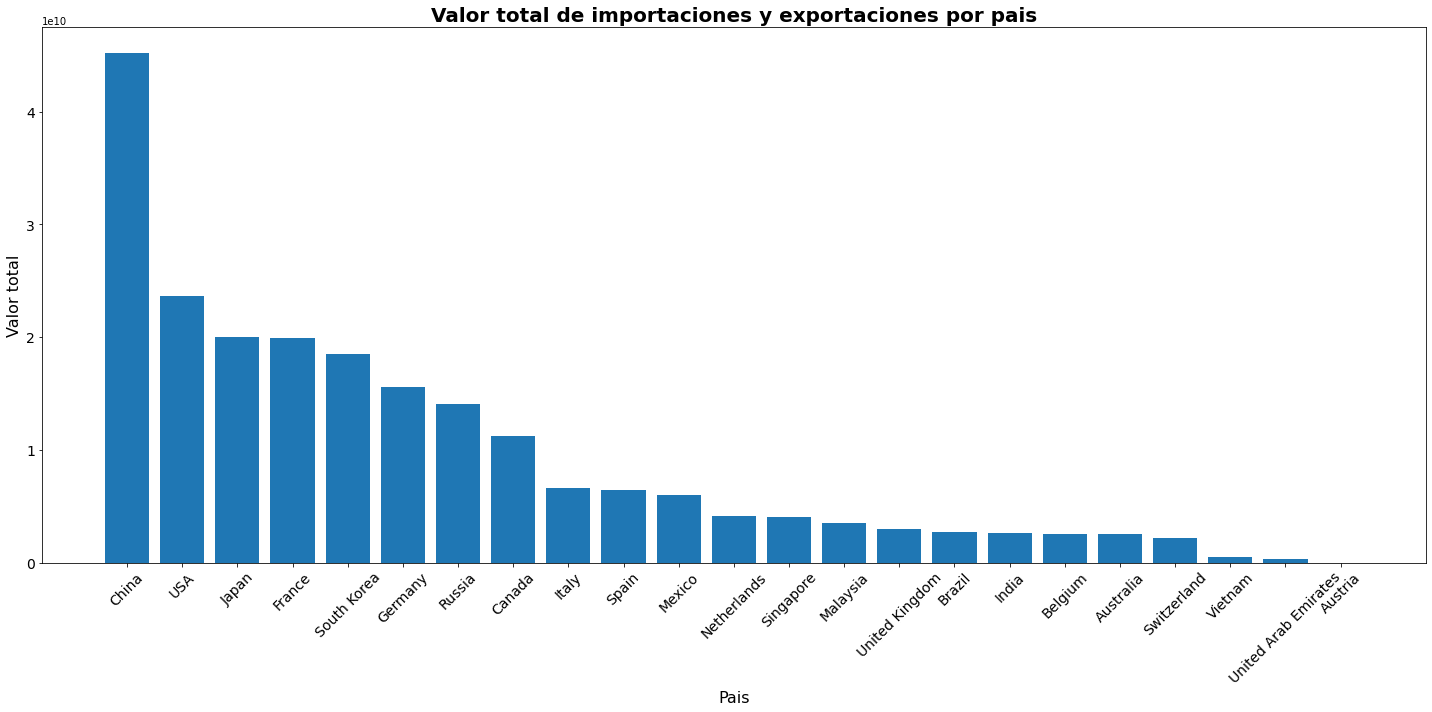

In [47]:
fig,ax = plt.subplots(figsize=(20,10))

ax.bar(total_value_country.origin,total_value_country.total_value)

ax.set_title('Valor total de importaciones y exportaciones por pais')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)
ax.set_xlabel('Pais')
ax.set_ylabel('Valor total')
ax.xaxis.label.set_fontsize(16)
ax.yaxis.label.set_fontsize(16)

ax.set_xticklabels(total_value_country.origin, rotation = 45)

ax.tick_params(axis='both', which='major', labelsize=14)

fig.tight_layout()

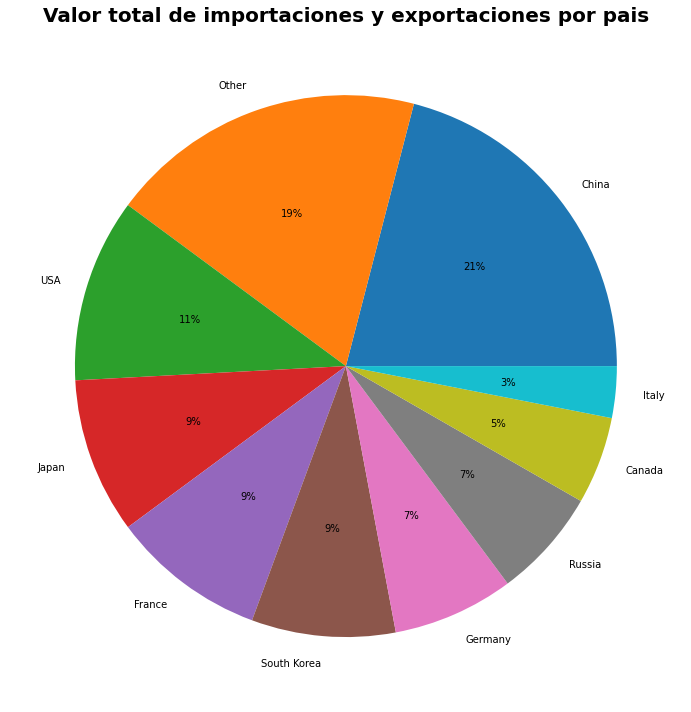

In [23]:
fig,ax = plt.subplots(figsize=(20,10))

ax.pie(x=pie_data.total_value,labels=pie_data.country,autopct='%1.0f%%')

ax.set_title('Valor total de importaciones y exportaciones por pais')
ax.title.set_fontweight('bold')
ax.title.set_fontsize(20)

fig.tight_layout()